<a href="https://colab.research.google.com/github/KamilaAkhmetova/MPA-MLF/blob/main/MPA_MLF_PCA_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA through Singular Value Decomposition

In [2]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])

# If two features are positively correlated,
#  their covariance is greater than zero.
#  If negatively correlated, their covariance is less than zero.
#  If the covariance is zero, then the features are independent.

# Calculate the covariance matrix:
# it could be done also bt using this formula(/(n-1))
# R = np.matmul(X, X.T)/2
R = np.matmul(X, X.T)/3

# D diagonal matrix, U, V eigenvectors?
# first basis direction goes to the highest second is ortogonal to the first and goes to the second highest direction

# сингулярные разложения
# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
print(U)
u1=U[:,0] # new basis vectors
u2=U[:,1]
print(u1)
print(u2)

# Calculate the coordinates in new orthonormal basis:

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original


[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
[-0.40455358 -0.9145143 ]
[-0.9145143   0.40455358]


# PCA on Iris data

In [3]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

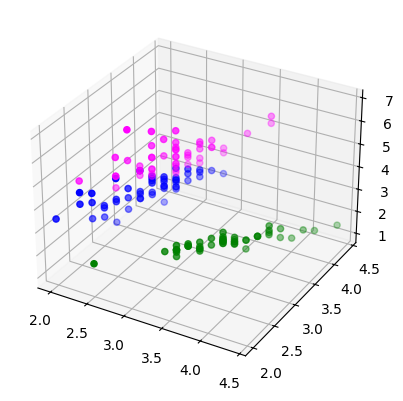

In [33]:
import matplotlib.pyplot as plt
X=iris.data
y=iris.target
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

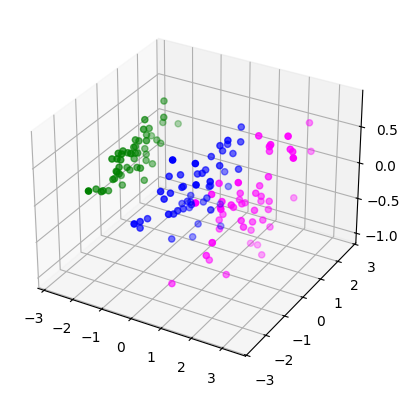

In [34]:
# We have 4 dimensions of data, plot the first three colums in 3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# one way of normalization
# from sklearn.preprocessing import MinMaxScaler

Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)
from sklearn import decomposition
# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


array([2.93808505, 0.9201649 , 0.14774182])

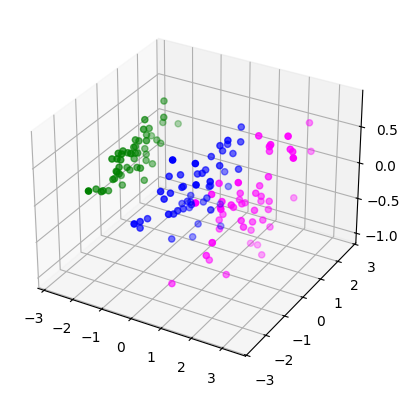

In [35]:
# from sklearn.decomposition import PCA
# if we write like this, then
# pca = PCA(n_components = 2)

# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import decomposition
from sklearn import preprocessing
# normalization
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)
axes2=plt.axes(projection='3d')

# define PCA object (three components), fit and transform the data
# choosing only 3 important features
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
# another way to write this is
# X_pca = pca.fit_transform(X)
# X_pca.shape

print(pca.get_covariance())

# you can plot the transformed feature space in 3D:
# axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show
pca.explained_variance_

In [8]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [9]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

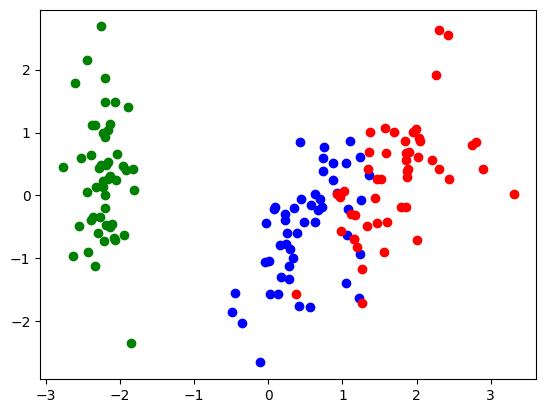

In [10]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y == 0,0], Xpca[y == 0,1], color = "green")
plt.scatter(Xpca[y == 1,0], Xpca[y == 1,1], color = "blue")
plt.scatter(Xpca[y == 2,0], Xpca[y == 2,1], color = "red")

# KNN classifier

(105, 4)
(45, 4)
0.9904761904761905
[[12  0  0]
 [ 0 14  2]
 [ 0  3 14]]


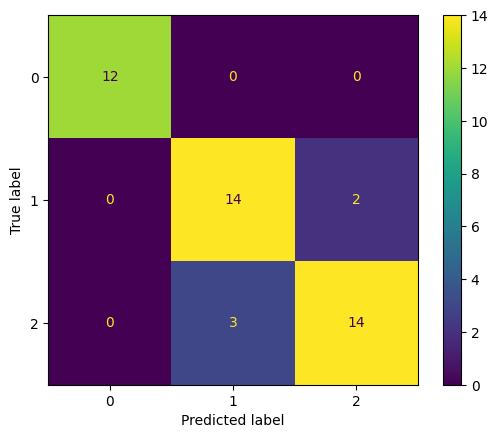

In [23]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
# the first task
# for Xpp?
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)

# neighbors is K
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
print(knn1.score(X_train, y_train))

Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



(105, 3)
(45, 3)
0.9714285714285714
[[17  0  0]
 [ 0 14  0]
 [ 0  1 13]]


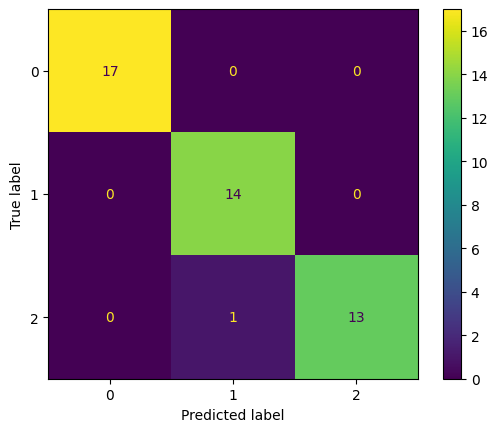

In [29]:
# 2 task
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)

# neighbors is K
knn1=KNeighborsClassifier(n_neighbors = 5)
knn1.fit(X_train,y_train)
print(knn1.score(X_train, y_train))

Ypred=knn1.predict(X_test)
# Import and show confusion matrix

print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

(105, 2)
(45, 2)
1.0
[[13  0  0]
 [ 0 17  2]
 [ 0  3 10]]


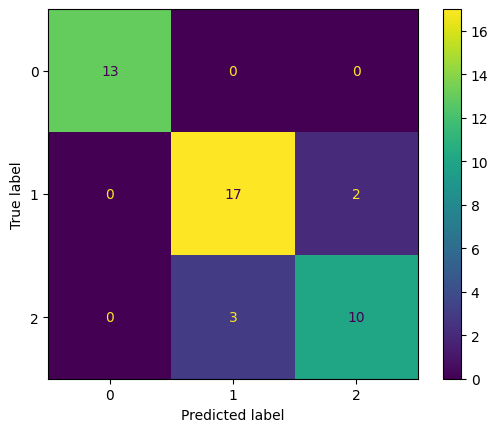

In [32]:
# the number of samples is differ?
# third task
# for Xpca
# removing the last column
X_train, X_test, y_train, y_test = train_test_split(Xpca[:, 0:2], y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)

# neighbors is K
knn1=KNeighborsClassifier(n_neighbors = 1)
knn1.fit(X_train,y_train)
print(knn1.score(X_train, y_train))

Ypred=knn1.predict(X_test)
# Import and show confusion matrix

print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



(105, 2)
(45, 2)
[[7 6 5]
 [5 6 4]
 [2 2 8]]


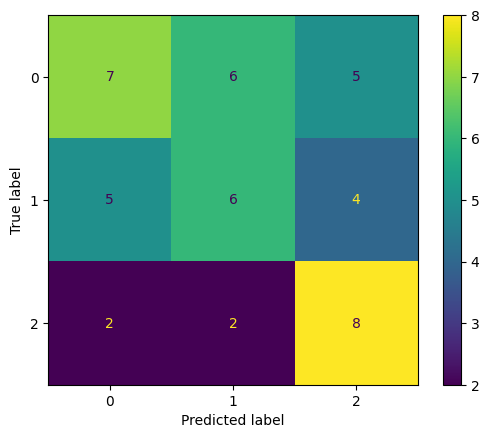

In [ ]:
# 4task
X_train, X_test, y_train, y_test = train_test_split(Xpca[:,1:3], y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)

# neighbors is K
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix

print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

In [ ]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).

#
# Compare the results with full dataset

(105, 2)
(45, 2)
[[20  0  0]
 [ 0 11  3]
 [ 0  7  4]]


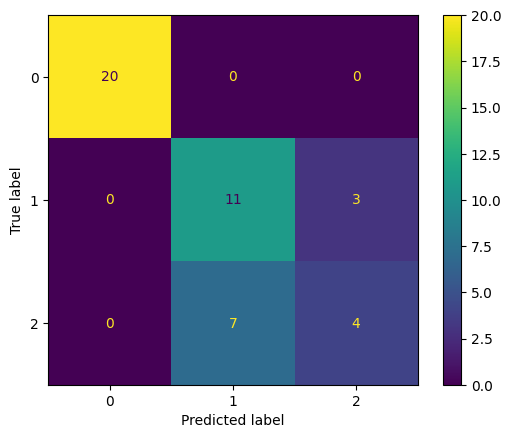

In [ ]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
X_train, X_test, y_train, y_test = train_test_split(X[:,0:2], y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)

# neighbors is K
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix

print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)